In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#Reading the data as panda
data = pd.read_csv('Final.csv')

In [32]:
data.head()

,Unnamed: 0,State,District,Population,Children_Between_1_to_2_years,Total_Arthritis_Patient,Arthritis_Patient_Male,Arthritis_Patient_Female,Children_Vaccinated,Children_Immunized,Children_Vaccinated_at_Birth,Children_Not_Vaccinated,Total_Children_Weighted,Children_Weighted_less_than_2.5_Kg,Women_Aged_15_49_years
0,0,Assam,Barpeta,64606,2371,1072.0,832.0,1328.0,76.5,62.1,67.7,4.3,55.3,22.5,12208.5
1,1,Assam,Bongaigaon,84012,2451,929.0,701.0,1171.0,67.8,52.4,73.7,3.4,55.7,21.6,16157.0
2,2,Assam,Cachar,127158,5709,2964.0,2448.0,3474.0,71.3,64.5,82.0,2.7,61.7,27.8,22614.5
3,3,Assam,Darrang,29048,984,1557.0,1360.0,1766.0,79.3,56.4,76.3,5.3,65.0,25.2,5225.5
4,4,Assam,Dhemaji,75451,3467,1109.0,958.0,1265.0,80.4,66.6,78.5,7.5,74.1,14.5,13844.0


In [33]:
#Dropping features that does not affect output
data.drop(columns=['District','Population','Children_Between_1_to_2_years','Arthritis_Patient_Male','Arthritis_Patient_Female','Children_Vaccinated','Children_Immunized','Children_Vaccinated_at_Birth','Total_Children_Weighted','Children_Weighted_less_than_2.5_Kg'],inplace=True)

In [34]:
data.head()

,Unnamed: 0,State,Total_Arthritis_Patient,Children_Not_Vaccinated,Women_Aged_15_49_years
0,0,Assam,1072.0,4.3,12208.5
1,1,Assam,929.0,3.4,16157.0
2,2,Assam,2964.0,2.7,22614.5
3,3,Assam,1557.0,5.3,5225.5
4,4,Assam,1109.0,7.5,13844.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               284 non-null    int64  
 1   State                    284 non-null    object 
 2   Total_Arthritis_Patient  284 non-null    float64
 3   Children_Not_Vaccinated  284 non-null    float64
 4   Women_Aged_15_49_years   284 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.2+ KB


In [68]:
#Loading in put features in X and output targets as Y

X = data[['Total_Arthritis_Patient' ,'Children_Not_Vaccinated', 'Women_Aged_15_49_years']]
Y = data['State']


In [69]:
X

,Total_Arthritis_Patient,Children_Not_Vaccinated,Women_Aged_15_49_years
0,1072.00,4.30,12208.5
1,929.00,3.40,16157.0
2,2964.00,2.70,22614.5
3,1557.00,5.30,5225.5
4,1109.00,7.50,13844.0
...,...,...,...
279,5884.42,1.28,20711.5
280,4110.77,1.67,27629.0
281,1332.66,5.73,39272.5
282,1612.24,2.79,15773.5


In [70]:
Y

0            Assam
1            Assam
2            Assam
3            Assam
4            Assam
          ...     
279    Uttarakhand
280    Uttarakhand
281    Uttarakhand
282    Uttarakhand
283    Uttarakhand
Name: State, Length: 284, dtype: object

In [71]:
#Encoding the input features and output targets

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(X)

lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(Y)


print(x.shape, y.shape)


(284, 3) (284, 9)


In [72]:
x

array([[1.30136115e-01, 1.35693215e-01, 1.85285770e-01],
       [1.11945045e-01, 1.06194690e-01, 2.59752751e-01],
       [3.70817962e-01, 8.32513930e-02, 3.81538374e-01],
       [1.91833100e-01, 1.68469354e-01, 5.35894462e-02],
       [1.34842895e-01, 2.40576860e-01, 2.16130584e-01],
       [2.39918585e-01, 2.50409702e-01, 1.40183126e-01],
       [6.52079888e-01, 2.42543428e-02, 3.07835205e-01],
       [2.02137133e-01, 1.42248443e-01, 2.34066027e-01],
       [9.09935123e-01, 4.06424123e-02, 2.15366771e-01],
       [4.59356316e-01, 2.37299246e-01, 0.00000000e+00],
       [1.00000000e+00, 3.73647984e-02, 5.92312842e-01],
       [1.40567358e-01, 3.73647984e-02, 5.50850095e-01],
       [6.06538608e-01, 1.91412652e-01, 1.76789537e-01],
       [5.15201628e-01, 2.30744018e-01, 6.03694588e-02],
       [1.84327694e-01, 7.66961652e-02, 2.07926674e-02],
       [1.68299199e-01, 4.71976401e-02, 5.62769338e-02],
       [1.75677395e-01, 9.96394625e-02, 4.28649561e-01],
       [5.19908409e-01, 1.81579

In [73]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [74]:
#Creating Test and Train  data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3, 241)
x test:  (3, 43)
y train:  (9, 241)
y test:  (9, 43)


In [75]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [76]:
#Reshaping the data to feed into the model

x_train = x_train.reshape(241,3)
x_test = x_test.reshape(43,3)
y_train = y_train.reshape(241,9)
y_test = y_test.reshape(43,9)

In [77]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (241, 3)
x test:  (43, 3)
y train:  (241, 9)
y test:  (43, 9)


In [78]:
#3 hidden layer NN-model

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

model = Sequential()

model.add(Dense(512, activation= 'relu', use_bias = True, input_shape=(241, 3)))
model.add(Dropout(0.2))
model.add(Dense(256, activation= 'relu', use_bias = True  ))
model.add(Dropout(0.2))
model.add(Dense(128, activation= 'sigmoid', use_bias = True  ))
model.add(Dropout(0.1))
model.add(Dense(9, activation= 'sigmoid'))

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 241, 512)          2048      
_________________________________________________________________
dropout_17 (Dropout)         (None, 241, 512)          0         
_________________________________________________________________
dense_24 (Dense)             (None, 241, 256)          131328    
_________________________________________________________________
dropout_18 (Dropout)         (None, 241, 256)          0         
_________________________________________________________________
dense_25 (Dense)             (None, 241, 128)          32896     
_________________________________________________________________
dropout_19 (Dropout)         (None, 241, 128)          0         
_________________________________________________________________
dense_26 (Dense)             (None, 241, 9)           

In [80]:
history = []

In [81]:
#Training and validating
history = model.fit(x_train, y_train,
          batch_size=32, epochs=100, validation_data=(x_test, y_test))
          

Epoch 1/100
8/8 [==============================] - 1s 20ms/step - loss: 0.7631 - accuracy: 0.0954 - val_loss: 0.6032 - val_accuracy: 0.0930
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5491 - accuracy: 0.0581 - val_loss: 0.4144 - val_accuracy: 0.0698
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3957 - accuracy: 0.1203 - val_loss: 0.3492 - val_accuracy: 0.1860
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3609 - accuracy: 0.1535 - val_loss: 0.3624 - val_accuracy: 0.0465
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3569 - accuracy: 0.1203 - val_loss: 0.3673 - val_accuracy: 0.0465
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3555 - accuracy: 0.1079 - val_loss: 0.3674 - val_accuracy: 0.0698
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3541 - accuracy: 0.1162 - val_loss: 0.3644 - val_accuracy: 0.0233
Epoch 8/100
8/8 [=========

Text(0.5, 1.0, 'Loss')

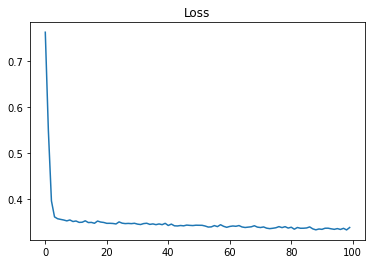

In [85]:
plt.plot(history.history['loss'])
plt.title('Loss')